Now let's try using what we learned about Keras against regular TensorFlow examples to see how to implement it when the code isn't already built for us

For a list of the datasets built into Keras, see here: https://keras.io/datasets/

## Image Classification - ImageNet dataset

I'd like to get smarter on image classification, and there are a couple ways to do this.  Rather than train a brand new network, I'm going use pre-trained models cloned from github. I'm also downloading a subset of the ImageNet dataset for testing. 

Github site: https://github.com/fchollet/deep-learning-models

Explanation: http://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/

So we need to clone that github page and then import the python modules.  Also, for this to work we need to add "import numpy as np" to our imports (we're doing this most of the time anyway, but it wasn't part of the tutorial so figured I'd mention it).

In [71]:
from resnet50 import ResNet50
from vgg16 import VGG16
from imagenet_utils import preprocess_input, decode_predictions
from IPython.display import Image as DisplayImage
from IPython.display import display
from keras.preprocessing import image
from keras.models import Model
import numpy as np
import os

In [36]:
model = ResNet50(weights='imagenet')

img_path = 'cute_puppy.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

('Predicted:', [[(u'n02104029', u'kuvasz', 0.72259384), (u'n02099601', u'golden_retriever', 0.1279905), (u'n02111500', u'Great_Pyrenees', 0.087382384), (u'n02099712', u'Labrador_retriever', 0.042812694), (u'n02113799', u'standard_poodle', 0.011615061)]])


In [37]:
x.shape

(1, 224, 224, 3)

(u'n02099601', u'golden_retriever', 0.620525)
(u'n02104029', u'kuvasz', 0.13482961)
(u'n02111500', u'Great_Pyrenees', 0.10147177)
(u'n02102318', u'cocker_spaniel', 0.051835161)
(u'n02113799', u'standard_poodle', 0.047305819)


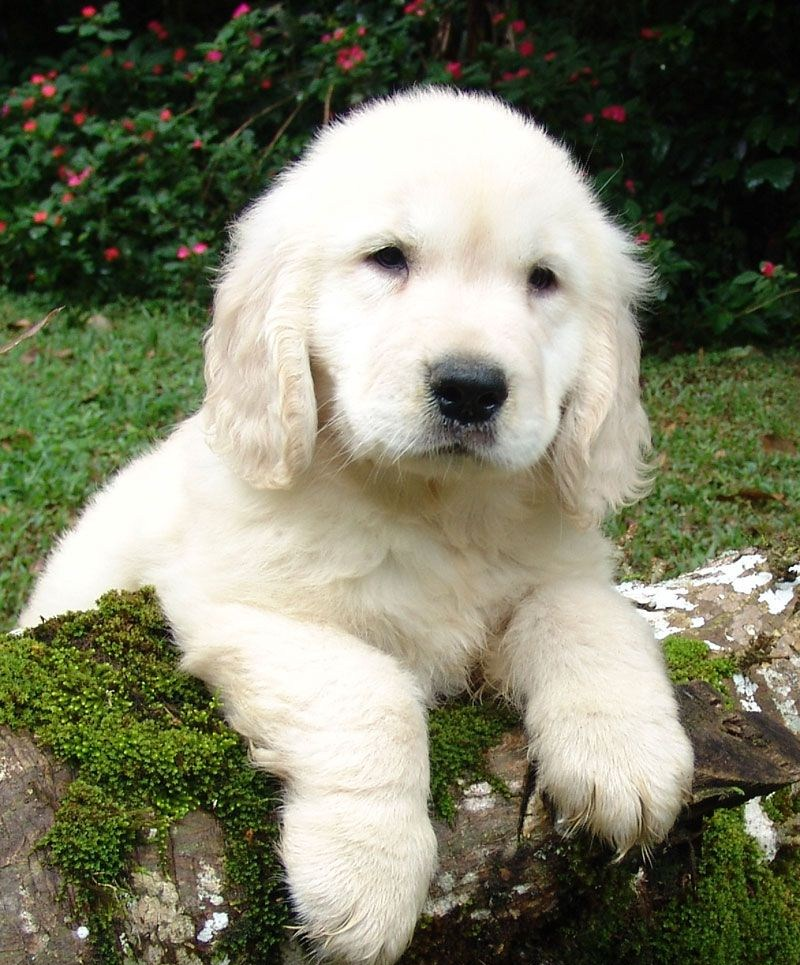

In [48]:
for prediction in decode_predictions(preds)[0]:
    print prediction

DisplayImage(img_path)

Well that's amazing...

A few notes - the first time you run these, it has to download the weights - this isn't needed on subsequent runs.

A kuvasz is a white dog that as an adult looks an awful lot like a cute puppy retriever.  It's impressive to be able to just plug in the weights of what already exists, and is something we could implement right away.  ResNet50 returns the image classification probabilities - you can also get the features if desired using VGG16 or VGG19:

In [42]:
model = VGG16(weights='imagenet', include_top=False)

img_path = 'cute_puppy.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

#Note that you CANT immediately make a decode the prediction based on the features here because "include_top=False" 
#was included in the model.  Remove that line and you can classify using VGG16:

In [41]:
model = VGG16(weights='imagenet')

img_path = 'cute_puppy.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
for prediction in decode_predictions(preds)[0]:
    print prediction

(u'n02099601', u'golden_retriever', 0.620525)
(u'n02104029', u'kuvasz', 0.13482961)
(u'n02111500', u'Great_Pyrenees', 0.10147177)
(u'n02102318', u'cocker_spaniel', 0.051835161)
(u'n02113799', u'standard_poodle', 0.047305819)


So VGG16 correctly predicts that it's a golden retriever rather than a kuvasz!

While getting that code set up, the ImageNet test files finished downloading (finally).  Let's try our hand at classifying those in batches

In [51]:
#First let's use a helper function I've used over and over:
    
def get_file_list(path):
    #Returns a recursive list of all files in the specified file path

    fileList = []
    
    for root, dirs, files in os.walk(path):
        path = root.split(os.sep)
        for file in files:
            fileList.append(file)
    
    return sorted(fileList)

In [53]:
fileList = get_file_list("./images")
fileList[:10]

['ILSVRC2012_test_00000003.JPEG',
 'ILSVRC2012_test_00000004.JPEG',
 'ILSVRC2012_test_00000013.JPEG',
 'ILSVRC2012_test_00000014.JPEG',
 'ILSVRC2012_test_00000015.JPEG',
 'ILSVRC2012_test_00000016.JPEG',
 'ILSVRC2012_test_00000017.JPEG',
 'ILSVRC2012_test_00000018.JPEG',
 'ILSVRC2012_test_00000019.JPEG',
 'ILSVRC2012_test_00000020.JPEG']

In [72]:
'''Since we want to run this repeatedly now, make it a function'''

def get_predictions(path,model):
    
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    display(DisplayImage(path))
    for prediction in decode_predictions(preds)[0]:
        print prediction

In [ ]:
model = VGG16(weights='imagenet')

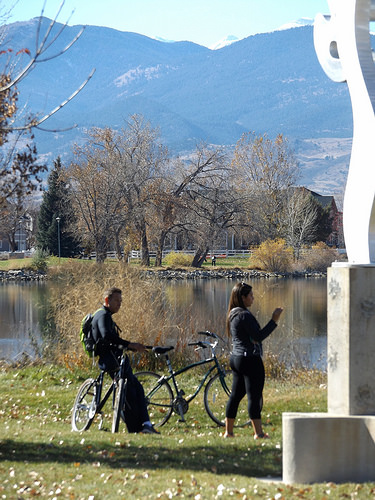

(u'n02108000', u'EntleBucher', 0.085656554)
(u'n02437616', u'llama', 0.070537008)
(u'n04604644', u'worm_fence', 0.061343409)
(u'n03967562', u'plow', 0.050794836)
(u'n02089973', u'English_foxhound', 0.040525995)


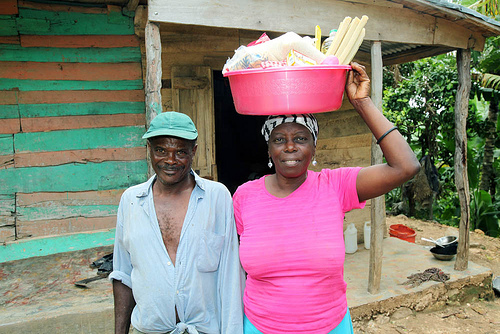

(u'n04613696', u'yurt', 0.078190394)
(u'n03992509', u"potter's_wheel", 0.039166436)
(u'n03697007', u'lumbermill', 0.036891684)
(u'n04428191', u'thresher', 0.036492288)
(u'n04136333', u'sarong', 0.032258015)


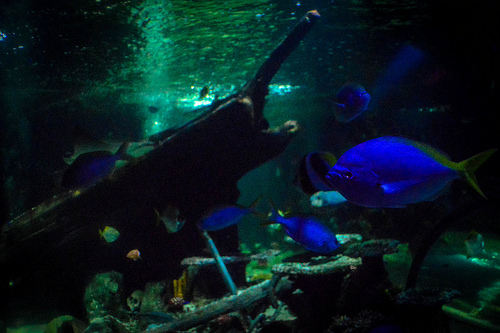

(u'n10565667', u'scuba_diver', 0.35318863)
(u'n09256479', u'coral_reef', 0.14516385)
(u'n01498041', u'stingray', 0.093774982)
(u'n01984695', u'spiny_lobster', 0.07364969)
(u'n01496331', u'electric_ray', 0.057627324)


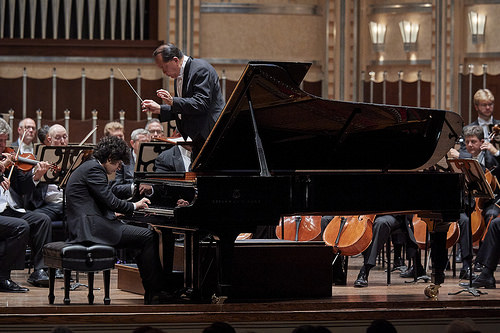

(u'n03452741', u'grand_piano', 0.91581482)
(u'n02804610', u'bassoon', 0.015775327)
(u'n04515003', u'upright', 0.015139188)
(u'n03838899', u'oboe', 0.014207986)
(u'n02992211', u'cello', 0.011188782)


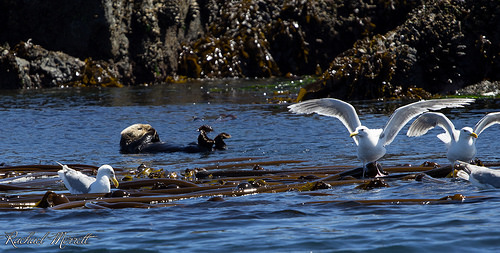

(u'n02009912', u'American_egret', 0.71163744)
(u'n01855672', u'goose', 0.061416022)
(u'n02012849', u'crane', 0.046472698)
(u'n02027492', u'red-backed_sandpiper', 0.032945942)
(u'n09332890', u'lakeside', 0.026079787)


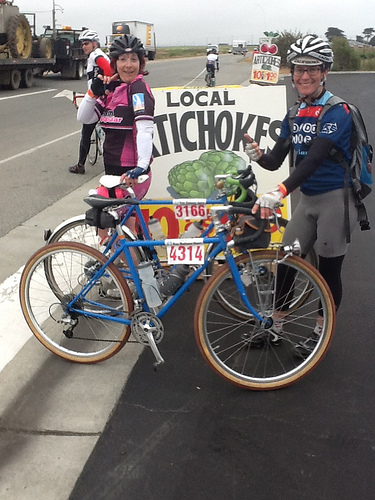

(u'n03792782', u'mountain_bike', 0.39325261)
(u'n02835271', u'bicycle-built-for-two', 0.39178258)
(u'n04482393', u'tricycle', 0.030340092)
(u'n09193705', u'alp', 0.024936413)
(u'n03127747', u'crash_helmet', 0.02000729)


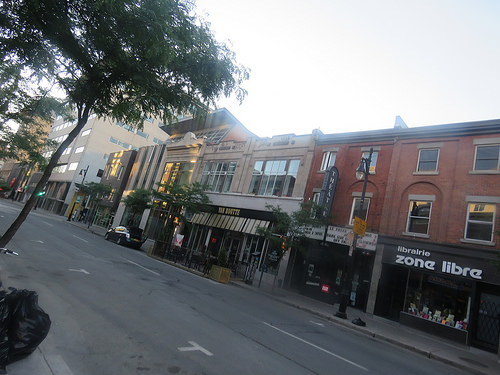

(u'n04335435', u'streetcar', 0.36787471)
(u'n03393912', u'freight_car', 0.074493915)
(u'n04487081', u'trolleybus', 0.060463663)
(u'n04525305', u'vending_machine', 0.03904051)
(u'n02823428', u'beer_bottle', 0.037094459)


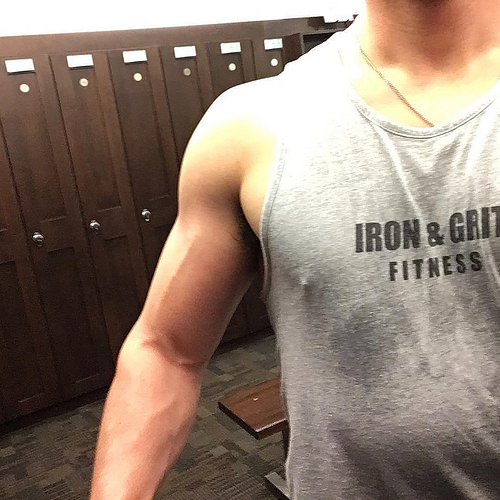

(u'n03595614', u'jersey', 0.42299691)
(u'n04370456', u'sweatshirt', 0.080581687)
(u'n03124170', u'cowboy_hat', 0.061896589)
(u'n02807133', u'bathing_cap', 0.021483019)
(u'n04371430', u'swimming_trunks', 0.015221564)


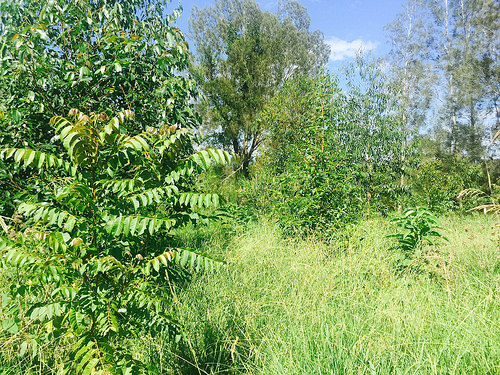

(u'n07802026', u'hay', 0.07709296)
(u'n09332890', u'lakeside', 0.046469312)
(u'n04326547', u'stone_wall', 0.041116104)
(u'n02410509', u'bison', 0.034292355)
(u'n04604644', u'worm_fence', 0.031988811)


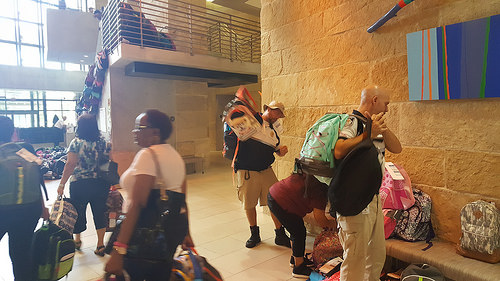

(u'n01704323', u'triceratops', 0.61717433)
(u'n02927161', u'butcher_shop', 0.11059112)
(u'n04136333', u'sarong', 0.037438314)
(u'n03000684', u'chain_saw', 0.016880598)
(u'n02437312', u'Arabian_camel', 0.011952278)


In [73]:
#Give us a random start image
startIndex = np.random.randint(0,len(fileList)-10)

picBatch = fileList[startIndex:startIndex+10]

#Process the next 10 images:
for fileName in picBatch:
    fullPath = './images/test/'+fileName
    get_predictions(fullPath,model)

Wow... so... those are some interesting results. As expected, it has a hard time with compound situations - ones where lots of different things are going on.  It also has a hard time seeing the forest through the trees.  Let's see how resnet50 does with the exact same dataset:

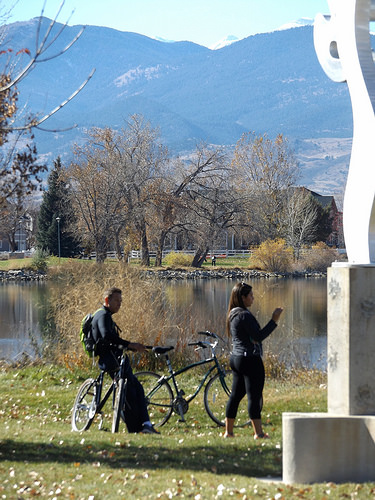

(u'n03538406', u'horse_cart', 0.57119411)
(u'n03967562', u'plow', 0.17104606)
(u'n02110341', u'dalmatian', 0.072663173)
(u'n02403003', u'ox', 0.046899255)
(u'n02107574', u'Greater_Swiss_Mountain_dog', 0.010173423)


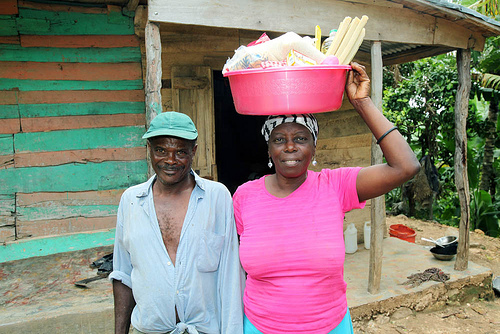

(u'n04560804', u'water_jug', 0.29835767)
(u'n02909870', u'bucket', 0.21774027)
(u'n03970156', u'plunger', 0.13859485)
(u'n02797295', u'barrow', 0.059878804)
(u'n03876231', u'paintbrush', 0.032096222)


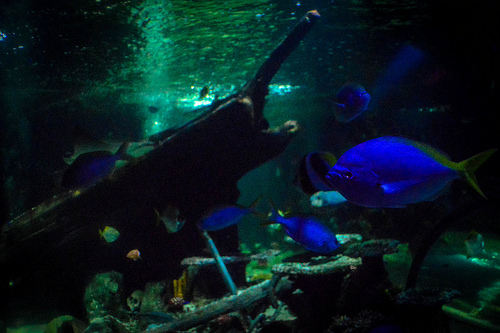

(u'n10565667', u'scuba_diver', 0.38260293)
(u'n04606251', u'wreck', 0.35081035)
(u'n01498041', u'stingray', 0.043987397)
(u'n04296562', u'stage', 0.024415802)
(u'n01491361', u'tiger_shark', 0.018049732)


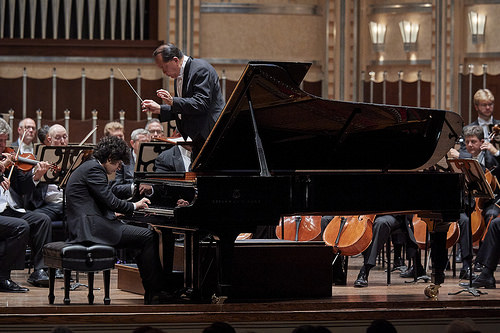

(u'n03452741', u'grand_piano', 0.40527281)
(u'n02804610', u'bassoon', 0.1302748)
(u'n04515003', u'upright', 0.102787)
(u'n04141076', u'sax', 0.09481246)
(u'n03838899', u'oboe', 0.084727533)


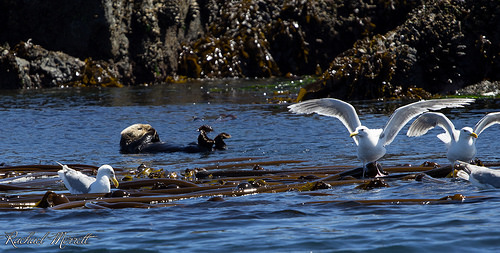

(u'n01855672', u'goose', 0.28435937)
(u'n02009912', u'American_egret', 0.23461896)
(u'n02006656', u'spoonbill', 0.067445301)
(u'n02012849', u'crane', 0.053325944)
(u'n02013706', u'limpkin', 0.046235405)


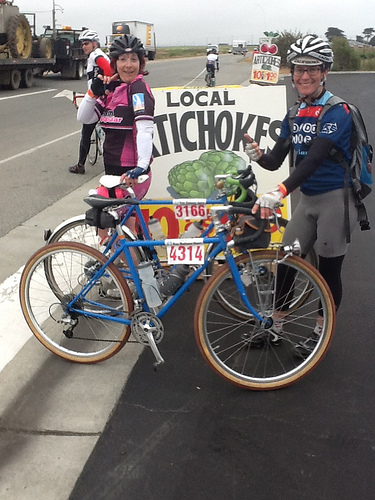

(u'n03792782', u'mountain_bike', 0.85484737)
(u'n02835271', u'bicycle-built-for-two', 0.13495512)
(u'n09193705', u'alp', 0.0030436106)
(u'n04482393', u'tricycle', 0.0015588071)
(u'n02110063', u'malamute', 0.00058595021)


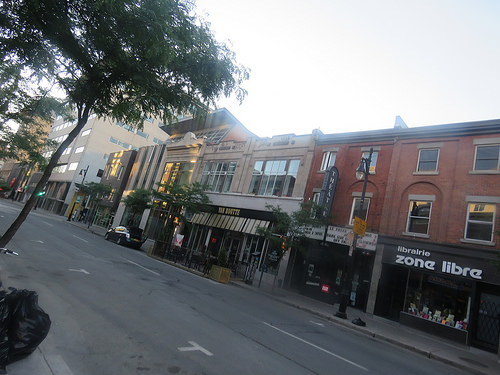

(u'n04335435', u'streetcar', 0.2000114)
(u'n03345487', u'fire_engine', 0.17662613)
(u'n03393912', u'freight_car', 0.092522137)
(u'n04487081', u'trolleybus', 0.055861529)
(u'n03895866', u'passenger_car', 0.051049739)


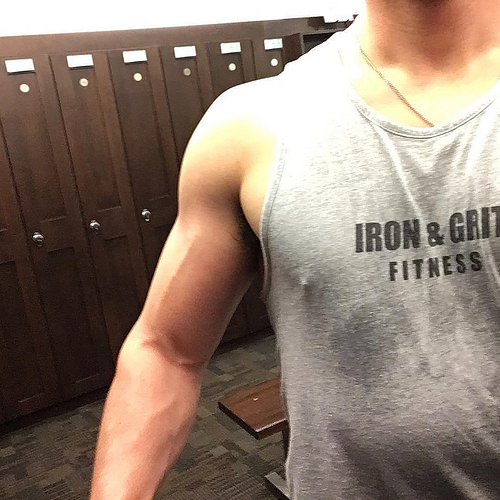

(u'n03124170', u'cowboy_hat', 0.099857107)
(u'n03595614', u'jersey', 0.087627843)
(u'n07615774', u'ice_lolly', 0.046434388)
(u'n04355933', u'sunglass', 0.041684274)
(u'n04356056', u'sunglasses', 0.039792772)


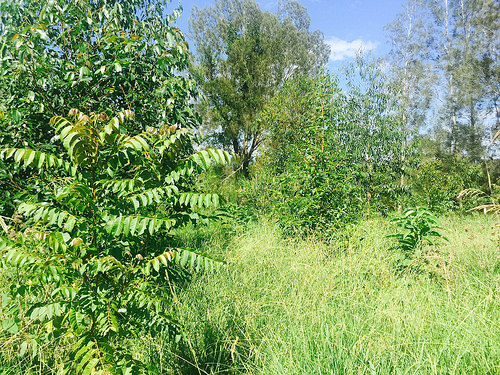

(u'n13133613', u'ear', 0.15496966)
(u'n11879895', u'rapeseed', 0.10087189)
(u'n02504458', u'African_elephant', 0.046827942)
(u'n12144580', u'corn', 0.044980105)
(u'n03733281', u'maze', 0.042368408)


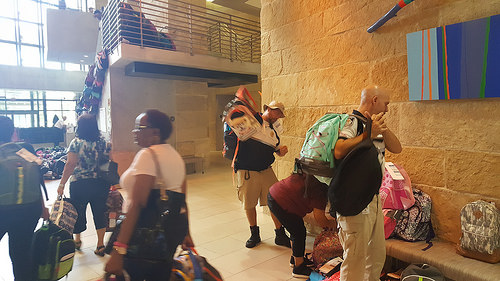

(u'n02927161', u'butcher_shop', 0.55572879)
(u'n03325584', u'feather_boa', 0.038597301)
(u'n02389026', u'sorrel', 0.033387545)
(u'n04532106', u'vestment', 0.032022752)
(u'n04259630', u'sombrero', 0.022583902)


In [74]:
model = ResNet50(weights='imagenet')

#Process the next 10 images:
for fileName in picBatch:
    fullPath = './images/test/'+fileName
    get_predictions(fullPath,model)

ResNet50 seems to do worse here - and even when it's right, ResNet has lower confidence than VGG

So! This is a good review of how easy it is to pull in weighted models using open source tools